##Introduction

This assessment requires me to produce a machine learning model that is trained, tested, and evaluated using a set of secondary data.
<br/><br/>
I examined several different data sets before chosing one from a renowned data science company; Kaggle. The data set I chose contains information on used cars and their sales in India - https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho?select=car+data.csv.
<br/><br/>
I chose this data set because it is an 'Open Database', meaning the data is free-to-use and redistribute, and it has a high usability score of 10 - the highest awardable score. The usability score represents the level of documentation the dataset has, and high score indicates high quality data that is both fit-for-purpose and ready for analysis.
<br/><br/>
With this data set I intend to predict the selling price of different cars based on other variables that have been provided. The data comes with the labels, so this problem fits into the machine learning subcategory of supervised learning. This is also a regression problem and I will use a linear regression algorithm to train a model that can solve the it. It is sometimes useful to use k-fold cross validation to compare different machine learning methods - so that the best one can be selected. However, I don't believe this to be necessary here because the best machine learning method for this problem is clearly multiple linear regression. 
<br/><br/>
The data set I have chosen contains 3 seperate CSV (comma-seperated values) files with different data and labels in each. There are a lot of similarities between the CSV files, but there are also several differences. In order to create a machine learning model that uses all of the available data, I must clean the data in each CSV file and concatenate this data into a single set of data. So, the first thing I did after importing the dataset, and the required Python libraries, was inspect and clean the data in each CSV file.
<br/><br/>

##Importing the Dataset.

In [252]:
#imports some required libraries.
import pandas as pd
import numpy as np

This dataset came with 3 .csv files so they have been imported and will be concatenated once properly cleaned.

In [253]:
#imports the datasets and stores them, as a DataFrame, in seperate variables.
df1 = pd.read_csv('car_data_1.csv')
df2 = pd.read_csv('car_data_2.csv')
df3 = pd.read_csv('car_data_3.csv')

##Inspecting Quality of First DataFrame

In [254]:
#returns the first five rows of the first DataFrame.
df1.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [255]:
#returns the shape of the first DataFrame --> (rows, columns).
df1.shape

(4340, 8)

In [256]:
#returns some basic information about the first DataFrame.
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


The first DataFrame contains non-null values across all of the data - meaning there is no missing data. This DataFrame also has integer values for the following labels:

*   year
*   selling_price
*   km_driven

This means the values under these labels, or in these columns, are all there in a numerical data type - this data appears mostly clean. Below is some notes on the remaining data:

*   name provides good categorical data but could be more concise
*   the remaining data is in the object data type and must be converted to numerical data 

In [257]:
#returns all the unique values in the name column.
df1['name'].unique()

array(['Maruti 800 AC', 'Maruti Wagon R LXI Minor',
       'Hyundai Verna 1.6 SX', ..., 'Mahindra Verito 1.5 D6 BSIII',
       'Toyota Innova 2.5 VX (Diesel) 8 Seater BS IV',
       'Hyundai i20 Magna 1.4 CRDi'], dtype=object)

In [258]:
#returns all the unique values in the fuel column.
df1['fuel'].unique()

array(['Petrol', 'Diesel', 'CNG', 'LPG', 'Electric'], dtype=object)

In [259]:
#returns all the unique values in the seller_type column.
df1['seller_type'].unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [260]:
#returns all the unique values in the transmission column.
df1['transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [261]:
#returns all the unique values in the owner column.
df1['owner'].unique()

array(['First Owner', 'Second Owner', 'Fourth & Above Owner',
       'Third Owner', 'Test Drive Car'], dtype=object)

##Cleaning the First DataFrame

In [262]:
#slices all values in the name column so only the first 3 words are kept. Words are then joined with a space instead of a comma.
df1['name'] = df1['name'].str.split(' ').str.slice(0,3).str.join(' ')

In [263]:
#look at first DataFrame to check changes have been made.
df1

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [264]:
#describes the numerical data in the first DataFrame.
df1.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


The value at the 75th percentile, or upper/third quartile, has a big difference to the maximum value - meaning that there are some outliers/anomalies in the data. These must be removed to ensure the data is properly cleaned.

In [265]:
#uses scientific notation to identify values larger than 6 x 10^6.
df1[df1['selling_price']>6e6]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
89,Mercedes-Benz S-Class S,2017,8150000,6500,Diesel,Dealer,Automatic,First Owner
3872,Audi RS7 2015-2019,2016,8900000,13000,Petrol,Dealer,Automatic,First Owner


In [266]:
#uses scientific notation to identify values less than 6 x 10^6 so that only 
#these values can be kept - removes outliers from the DataFrame.
df1 = df1[df1['selling_price']<6e6].reset_index(drop=True)

In [267]:
#locates all rows with the value 'Fourth & Above Owner' in the 'owner' column.
df1.loc[df1['owner'] == 'Fourth & Above Owner']

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
42,Hyundai i10 Magna,2014,229999,60000,Petrol,Individual,Manual,Fourth & Above Owner
75,Tata Indica Vista,2014,125000,166000,Diesel,Individual,Manual,Fourth & Above Owner
112,Maruti Wagon R,2010,100000,60000,Petrol,Individual,Manual,Fourth & Above Owner
124,Maruti Swift Vdi,2007,100000,110000,Diesel,Individual,Manual,Fourth & Above Owner
136,Maruti 800 Std,1998,40000,40000,Petrol,Individual,Manual,Fourth & Above Owner
...,...,...,...,...,...,...,...,...
3990,Maruti Zen LX,2001,93000,97000,Petrol,Individual,Manual,Fourth & Above Owner
4004,Maruti Wagon R,2004,70000,90000,Petrol,Individual,Manual,Fourth & Above Owner
4026,Toyota Corolla H2,2005,175000,100000,Petrol,Individual,Manual,Fourth & Above Owner
4027,Maruti Ritz VDi,2012,250000,110000,Diesel,Individual,Manual,Fourth & Above Owner


Below I replace the values in the 'owner' column with numeric values that represent the number of previous owners.

I decided to replace the value 'Test Drive Car' with '1' because even though these cars will have been test driven by multiple people, their condition and mileage (or 'km_driven') will be similar to that of a car with one previous owner.

I also decided to replace the value 'Fourth & Above Owner' with '3' instead of '3+' so that the data is consistent with all the other int64 values. There are only 81 rows, out of 4340 total rows, with the value 'Fourth & Above Owner' in the 'owner' column - so the knock on effect of this decision will be relatively small.

In [268]:
#replaces data in the 'owner' column with numeric data.
df1 = df1.replace({'owner' : { 'First Owner': 0, 'Second Owner': 1,
                               'Test Drive Car': 1, 'Third Owner': 2,
                               'Fourth & Above Owner': 3}})

In [269]:
#checking the data type of the 'owner' column has changed to int64.
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4338 entries, 0 to 4337
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4338 non-null   object
 1   year           4338 non-null   int64 
 2   selling_price  4338 non-null   int64 
 3   km_driven      4338 non-null   int64 
 4   fuel           4338 non-null   object
 5   seller_type    4338 non-null   object
 6   transmission   4338 non-null   object
 7   owner          4338 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 271.2+ KB


In [270]:
df1.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,0
1,Maruti Wagon R,2007,135000,50000,Petrol,Individual,Manual,0
2,Hyundai Verna 1.6,2012,600000,100000,Diesel,Individual,Manual,0
3,Datsun RediGO T,2017,250000,46000,Petrol,Individual,Manual,0
4,Honda Amaze VX,2014,450000,141000,Diesel,Individual,Manual,1


##Inspecting Quality of Second DataFrame

In [271]:
#returns the first five rows of the second DataFrame.
df2.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [272]:
#returns the shape of the second DataFrame --> (rows, columns).
df2.shape

(8128, 13)

In [273]:
#returns some basic information about the second DataFrame.
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


The second DataFrame also shares the same 8 labels as the first DataFrame. However, there are 13 columns in this data which means there are 5 new columns that have not been seen before:

*   mileage
*   engine
*   max_power
*   torque
*   seats

The data in these columns contains some null values and, with the exception of 'seats', the data has not been provided in a numerical format. These labels are also not present in the first DataFrame, so concatenating the 3 different DataFrames later on might be problematic. Additionally, I do not think these 5 variables will have as much impact on the target variable (selling_price), so I have decided to drop them.

The second DataFrame contains non-null values across all of the first 8 columns - meaning there is no missing data in the columns I am interested in. This DataFrame also has integer values for the following labels:

*   year
*   selling_price
*   km_driven

This means the values under these labels, or in these columns, are all there in a numerical data type - this data appears mostly clean. Below is some notes on the remaining data:

*   name provides good categorical data but could be more concise
*   the remaining data is in the object data type and must be converted to numerical data

In [274]:
#returns all the unique values in the name column.
df2['name'].unique()

array(['Maruti Swift Dzire VDI', 'Skoda Rapid 1.5 TDI Ambition',
       'Honda City 2017-2020 EXi', ..., 'Tata Nexon 1.5 Revotorq XT',
       'Ford Freestyle Titanium Plus Diesel BSIV',
       'Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV'], dtype=object)

In [275]:
#returns all the unique values in the fuel column.
df2['fuel'].unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [276]:
#returns all the unique values in the seller_type column.
df2['seller_type'].unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [277]:
#returns all the unique values in the transmission column.
df2['transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [278]:
#returns all the unique values in the owner column.
df2['owner'].unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

##Cleaning Second DataFrame

In [279]:
#drops 5 unwanted columns.
df2 = df2.drop(['mileage','engine','max_power','torque','seats'], axis=1)

In [280]:
#output the first 5 rows of the second DataFrame to check that the correct columns have been dropped.
df2.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner


In [281]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           8128 non-null   object
 1   year           8128 non-null   int64 
 2   selling_price  8128 non-null   int64 
 3   km_driven      8128 non-null   int64 
 4   fuel           8128 non-null   object
 5   seller_type    8128 non-null   object
 6   transmission   8128 non-null   object
 7   owner          8128 non-null   object
dtypes: int64(3), object(5)
memory usage: 508.1+ KB


In [282]:
#slices all values in the name column so only the first 3 words are kept. Words are then joined with a space instead of a comma.
df2['name'] = df2['name'].str.split(' ').str.slice(0,3).str.join(' ')

In [283]:
df2 = df2.replace({'owner' : { 'First Owner': 0, 'Second Owner': 1,
                               'Test Drive Car': 1, 'Third Owner': 2,
                               'Fourth & Above Owner': 3}})

In [284]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           8128 non-null   object
 1   year           8128 non-null   int64 
 2   selling_price  8128 non-null   int64 
 3   km_driven      8128 non-null   int64 
 4   fuel           8128 non-null   object
 5   seller_type    8128 non-null   object
 6   transmission   8128 non-null   object
 7   owner          8128 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 508.1+ KB


##Inspecting Quality of Third DataFrame

In [285]:
#returns the first five rows of the third DataFrame.
df3.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [286]:
#returns the shape of the third DataFrame --> (rows, columns).
df3.shape

(301, 9)

In [287]:
#returns some basic information about the third DataFrame.
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


The first thing I noticed about the third DataFrame was that it shares the same 8 labels as the first DataFrame, but with slightly different spellings. In order to correctly concatenate the 3 DataFrames I must make sure these labels match exactly with the labels found in the first and second DataFrame. 

There are also 9 columns in this DataFrame which means there is 1 new label (Present_Price) that has not been seen before. I think this variable will have less impact on the target variable (selling_price) than the other variables. This label is also not present in the other DataFrames and it might hinder the data concatenation later on, so I have decided to drop this column.

There are no null values across this data but some of the data has not been provided in a numerical format. The labels that do provide numerical data can be seen below:

*   Year
*   Selling_Price
*   Present_Price
*   Kms_Driven
*   Owner

In [288]:
#returns all the unique values in the Car_Name column.
df3['Car_Name'].unique()

array(['ritz', 'sx4', 'ciaz', 'wagon r', 'swift', 'vitara brezza',
       's cross', 'alto 800', 'ertiga', 'dzire', 'alto k10', 'ignis',
       '800', 'baleno', 'omni', 'fortuner', 'innova', 'corolla altis',
       'etios cross', 'etios g', 'etios liva', 'corolla', 'etios gd',
       'camry', 'land cruiser', 'Royal Enfield Thunder 500',
       'UM Renegade Mojave', 'KTM RC200', 'Bajaj Dominar 400',
       'Royal Enfield Classic 350', 'KTM RC390', 'Hyosung GT250R',
       'Royal Enfield Thunder 350', 'KTM 390 Duke ',
       'Mahindra Mojo XT300', 'Bajaj Pulsar RS200',
       'Royal Enfield Bullet 350', 'Royal Enfield Classic 500',
       'Bajaj Avenger 220', 'Bajaj Avenger 150', 'Honda CB Hornet 160R',
       'Yamaha FZ S V 2.0', 'Yamaha FZ 16', 'TVS Apache RTR 160',
       'Bajaj Pulsar 150', 'Honda CBR 150', 'Hero Extreme',
       'Bajaj Avenger 220 dtsi', 'Bajaj Avenger 150 street',
       'Yamaha FZ  v 2.0', 'Bajaj Pulsar  NS 200', 'Bajaj Pulsar 220 F',
       'TVS Apache RTR 180', 

In [289]:
#returns all the unique values in the Fuel_Type column.
df3['Fuel_Type'].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [290]:
#returns all the unique values in the Seller_Type column.
df3['Seller_Type'].unique()

array(['Dealer', 'Individual'], dtype=object)

In [291]:
#returns all the unique values in the Transmission column.
df3['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [292]:
#returns all the unique values in the Owner column.
df3['Owner'].unique()

array([0, 1, 3])

##Cleaning Third DataFrame

In [293]:
#drops the unwanted column.
df3 = df3.drop(['Present_Price'], axis=1)

In [294]:
df3.head()

,Car_Name,Year,Selling_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,42450,Diesel,Dealer,Manual,0


In [295]:
#renames labels to match with first and second DataFrame
df3 = df3.rename(columns={'Car_Name': 'name', 'Year': 'year',
                          'Selling_Price': 'selling_price', 'Kms_Driven': 'km_driven',
                          'Fuel_Type': 'fuel', 'Seller_Type': 'seller_type',
                          'Transmission': 'transmission', 'Owner': 'owner'})

In [296]:
df3.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,ritz,2014,3.35,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,42450,Diesel,Dealer,Manual,0


In [297]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           301 non-null    object 
 1   year           301 non-null    int64  
 2   selling_price  301 non-null    float64
 3   km_driven      301 non-null    int64  
 4   fuel           301 non-null    object 
 5   seller_type    301 non-null    object 
 6   transmission   301 non-null    object 
 7   owner          301 non-null    int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 18.9+ KB


The selling_price values need changing because they are given as 'lakhs' - an Idian noun meaning one hundred thousand. All the prices are given in the Indian currency - Indian rupees.

In [298]:
#slices all values in the name column so only the first 3 words are kept. Words are then joined with a space instead of a comma.
df3['name'] = df3['name'].str.split(' ').str.slice(0,3).str.join(' ')

In [299]:
#multiplies all selling_price values by 100,000 so they are consistent with the other DataFrames
df3['selling_price'] = 100000*df3['selling_price']

In [300]:
df3.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,ritz,2014,335000.0,27000,Petrol,Dealer,Manual,0
1,sx4,2013,475000.0,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,725000.0,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,285000.0,5200,Petrol,Dealer,Manual,0
4,swift,2014,460000.0,42450,Diesel,Dealer,Manual,0


In [301]:
df3['selling_price'] = df3['selling_price'].astype(int)

In [302]:
df3.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,ritz,2014,335000,27000,Petrol,Dealer,Manual,0
1,sx4,2013,475000,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,725000,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,285000,5200,Petrol,Dealer,Manual,0
4,swift,2014,459999,42450,Diesel,Dealer,Manual,0


In [303]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           301 non-null    object
 1   year           301 non-null    int64 
 2   selling_price  301 non-null    int64 
 3   km_driven      301 non-null    int64 
 4   fuel           301 non-null    object
 5   seller_type    301 non-null    object
 6   transmission   301 non-null    object
 7   owner          301 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 18.9+ KB


##Concatenating DataFrames

To simplify and improve the effectiveness of training the model, I have concatenated the 3 cleaned DataFrames (originally from each of the 3 CSV files) into one DataFrame:

In [304]:
#concatenates the three DataFrames into a single DataFrame and resets the index number of each row.
df = pd.concat([df1, df2, df3]).reset_index()

In [305]:
df = df.drop(['index'], axis = 1)

In [306]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,0
1,Maruti Wagon R,2007,135000,50000,Petrol,Individual,Manual,0
2,Hyundai Verna 1.6,2012,600000,100000,Diesel,Individual,Manual,0
3,Datsun RediGO T,2017,250000,46000,Petrol,Individual,Manual,0
4,Honda Amaze VX,2014,450000,141000,Diesel,Individual,Manual,1
...,...,...,...,...,...,...,...,...
12762,city,2016,950000,33988,Diesel,Dealer,Manual,0
12763,brio,2015,400000,60000,Petrol,Dealer,Manual,0
12764,city,2009,335000,87934,Petrol,Dealer,Manual,0
12765,city,2017,1150000,9000,Diesel,Dealer,Manual,0


In [307]:
#stores the concatenated data.
cleaned_car_data = df
#exports the concatenated data to a single new CSV file: cleaned_car_data.csv
cleaned_car_data.to_csv('cleaned_car_data.csv', encoding='utf-8', index=False)

##Training the Model

In [308]:
#all labels but the selling_price are independent variables.
X = df.drop(columns='selling_price')
#the selling_price is the target variable, aka the dependant variable.
y = df['selling_price']

In [309]:
X

,name,year,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,70000,Petrol,Individual,Manual,0
1,Maruti Wagon R,2007,50000,Petrol,Individual,Manual,0
2,Hyundai Verna 1.6,2012,100000,Diesel,Individual,Manual,0
3,Datsun RediGO T,2017,46000,Petrol,Individual,Manual,0
4,Honda Amaze VX,2014,141000,Diesel,Individual,Manual,1
...,...,...,...,...,...,...,...
12762,city,2016,33988,Diesel,Dealer,Manual,0
12763,brio,2015,60000,Petrol,Dealer,Manual,0
12764,city,2009,87934,Petrol,Dealer,Manual,0
12765,city,2017,9000,Diesel,Dealer,Manual,0


In [310]:
y

0          60000
1         135000
2         600000
3         250000
4         450000
          ...   
12762     950000
12763     400000
12764     335000
12765    1150000
12766     530000
Name: selling_price, Length: 12767, dtype: int64

Next I split the data using train_test_split from sklearn. A bit further on I ran the model with different training and testing splits to identify the ideal split for achieving a high r2 score. I also tested the different random states and have since updated the data split with the 2 tuned hyperparameters:

In [311]:
from sklearn.model_selection import train_test_split
#split the data 25% for testing, and 75% split for training. This was the result
#after tuning this hyperparameter.
#random_state 9053 - this hyperparameter has been tuned for improved model performance (see below).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 9053)

In the next section I will encode the categorical data ,in my cleaned data set, into a format that can be interpreted by the linear regression algorithm. To do this I will use the OneHotEncoder from sklearn.

In [312]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

In [313]:
#initializes encoder.
ohe = OneHotEncoder()
#fit OneHotEncoder to the specified columns in X so that categorical data can be encoded.
ohe.fit(X[['name','fuel','seller_type','transmission']])

OneHotEncoder()

In [314]:
#creates a column transformer that runs on all the previously specified columns.
column_tf = make_column_transformer((OneHotEncoder(categories=ohe.categories_),['name','fuel','seller_type','transmission']),
                                    #passthrough all remaining columns that were not specified
                                    remainder = 'passthrough')

In [315]:
#initialising the model.
ml = LinearRegression()

In [316]:
#creates a pipeline with the column transformer and model as arguments.
pipe = make_pipeline(column_tf, ml)

In [317]:
#input the training data into the pipeline so the columns can be transformed and
#the model can be trained.
pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['800', 'Activa 3g', 'Activa 4g', 'Ambassador CLASSIC 1500',
       'Ambassador Classic 2000', 'Ambassador Grand 1500',
       'Ambassador Grand 1800', 'Ambassador Grand 2000',
       'Ashok Leyland Stile', 'Audi A3 35', 'Audi A3 40', 'Audi A4 1.8',
       'Audi A4 2.0'...
       'land cruiser', 'omni', 'ritz', 's cross', 'swift', 'sx4', 'verna',
       'vitara brezza', 'wagon r', 'xcent'], dtype=object),
                                                                            array(['CNG', 'Diesel', 'Electric', 'LPG', 'Petrol'], dtype=object),
                                                                            array(['Dealer', 'Individual', 'Trustmark Dealer'], dtype=object),
                                                        

In [318]:
#y_pred (selling_price) = prediction made using the X_test data (all the other columns)
y_pred = pipe.predict(X_test)

In [319]:
#total variance predicted by the model --> higher score is better/more reliable.
#before hyperparamter optimization/tuning of the random_state. 
r2_score(y_test, y_pred)

0.9576948076053716

In [330]:
#improving the accuracy of the model by training with 10000 different 'random_state' values.
#THIS WILL TAKE A WHILE
r2_scores = []
for i in range(10000):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = i)
  ml = LinearRegression()
  pipe = make_pipeline(column_tf, ml)
  pipe.fit(X_train, y_train)
  y_pred = pipe.predict(X_test)
  r2_scores.append(r2_score(y_test, y_pred))

In [321]:
#finds the 'random_state' value with the highest r2_score.
np.argmax(r2_scores)

9053

In [322]:
#total variance predicted by the model --> higher score is better/more reliable.
#after hyperparamter optimization/tuning of the random_state. 
r2_scores[np.argmax(r2_scores)]

0.9576948076053716

##Evaluating the Model

To evaluate the accuracy of my model I must visualise how well it peformed. The best method of doing this for regression models is plotting a scatter graph to compare the predicted values with the actual values. To take it one step further I have plotted a red line to represent what a perfect prediction looks like. So, the further from the line the values lie, the greater the error in the prediction.

Text(0.5, 1.0, 'Actual vs. Predicted')

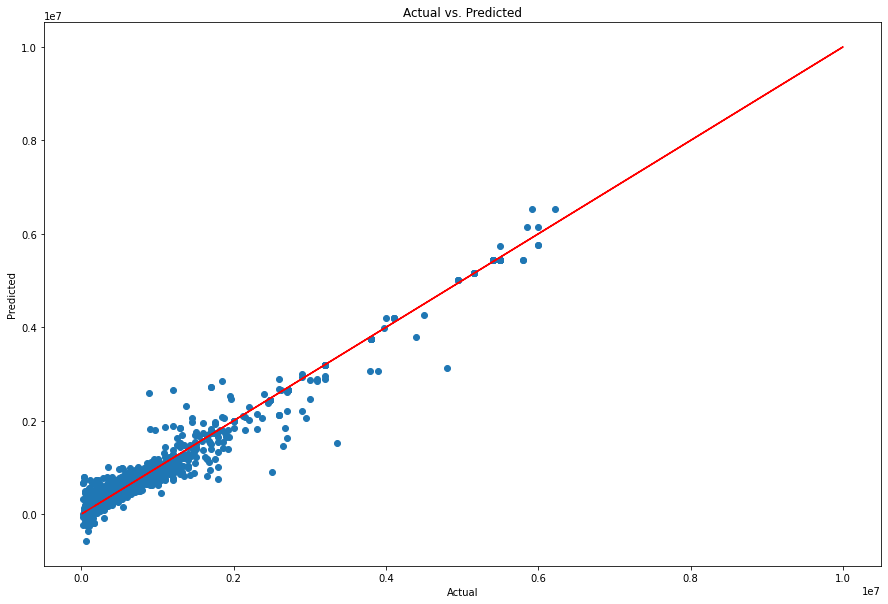

In [323]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.scatter(y_test, y_pred)
plt.plot(y_train, y_train, color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')

From the above we can see that the majority of the predicted values are quite close to the actual values. However, there are some anomalies which indicates that the model can still be improved. Below I have printed the actual values, the predicted values, and there differences in a DataFrame. 

In [324]:
y_pred_df = pd.DataFrame({'Actual Value':y_test, 'Predicted Value':y_pred, 'Difference':y_test-y_pred})
y_pred_df[0:20]

,Actual Value,Predicted Value,Difference
8375,750000,7.772690e+05,-27268.969537
5636,535000,3.210276e+05,213972.375965
8454,365000,2.843901e+05,80609.900453
5656,465000,5.427591e+05,-77759.055468
3724,540000,5.874695e+05,-47469.459667
2141,290000,3.118095e+05,-21809.522200
10305,270000,2.231835e+05,46816.545295
9640,625000,7.670578e+05,-142057.763657
10699,400000,4.214936e+05,-21493.604434
6178,220000,2.202671e+05,-267.057595


The differences here are hyperinflated because the Indian rupee is worth so little; the amount of rupees required to buy a car is very high. It is also observable that some predictions perform much better than others, but overall the model performs quite well. Another metric that can be used to measure the accuracy is the mean squared error (MSE).

In [325]:
from sklearn.metrics import mean_squared_error

#this is used to calculate the mean squared error.
#less is better as it means the average error is less.
#lower score indicates more accurate predictions - 0 is perfect.
mse = mean_squared_error(y_test, y_pred)
print(mse)

24155588107.236244


Again, the figure here is hyperinflated because the Indian rupee is worth so little. However, this does provide a good metric from which the model can be improved. If the model is modified, or data is added, then this figure can be observed to determine the overall accuracy. If the figure decreases then this means the average error has decreased and the model has improved.

In this Notebook I have:

*   Found a data set with high usability from a renowned data science company. 
*   Formalised a problem that I wanted to solve.
*   Cleaned and cocatenated the independent CSV files.
*   Split the data for training and testing.
*   Initialized the regression model with a linear regression algorithm.
*   Trained the model.
*   Tested the model.
*   Tuned the hyperparameters for improved model performance.
*   Evaluated the model.

There were not many ethical issues surrounding this model because I was working with car sales information which does not raise many ethical concerns. This data set is also an 'Open Database', meaning it is free and I do not need to get permission to use it. Overall, I believe this model does a good job of predicting car prices when given the relevant information for each independent variable. However, the model is not perfect and could still do a much better job. As with most models in machine learning, feeding more 'skinny' data (not so many columns, lots of rows) to the algorithm and making the data cleaning process more rigorous will improve the model. If I had more time to improve this model I would:

*   Clean the data more extensively make Car_Name column data in the car_data_3.csv file more consistent along with removing more anomalies in the data.
*   Find more car data to use when training and testing the model - it will need to be cleaned first.
*   Do more hyperparameter tuning (change the train test split and the random state values) to improve the accuracy of the model.


##Exporting Model

In [326]:
import pickle

In [327]:
#writes a binary pickle (.pkl) file containing the model.
pickle.dump(pipe, open('LinearRegressionModel.pkl', 'wb'))

In [328]:
#checks that the model can predict a price given the correct values.
pipe.predict(pd.DataFrame([['Hyundai Verna 1.6', '2012', 100000, 'Diesel', 'Individual', 'Manual', 0]],
                          columns=['name', 'year', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner']))

array([498813.72077566])